introdução

---


Você tem as ferramentas para obter dados de uma única tabela no formato que desejar. Mas e se os dados que você deseja estiverem espalhados por várias tabelas?

É aí que entra o JOIN! JOIN é incrivelmente importante em fluxos de trabalho SQL práticos. Então vamos começar.

## Exemplo

---


Usaremos nossa tabela de animais de estimação imaginários, que tem três colunas:

* ID - número de identificação do animal de estimação
* Nome - nome do animal de estimação
* Animal - tipo de animal

Também adicionaremos outra tabela, chamada proprietários. Esta tabela também tem três colunas:

* ID - número de identificação do proprietário (diferente do número de identificação do animal de estimação)
* Nome - nome do proprietário
* Pet_ID - Número de identificação do animal de estimação que pertence ao proprietário (que corresponde ao número de identificação do animal de estimação na tabela de animais de estimação)

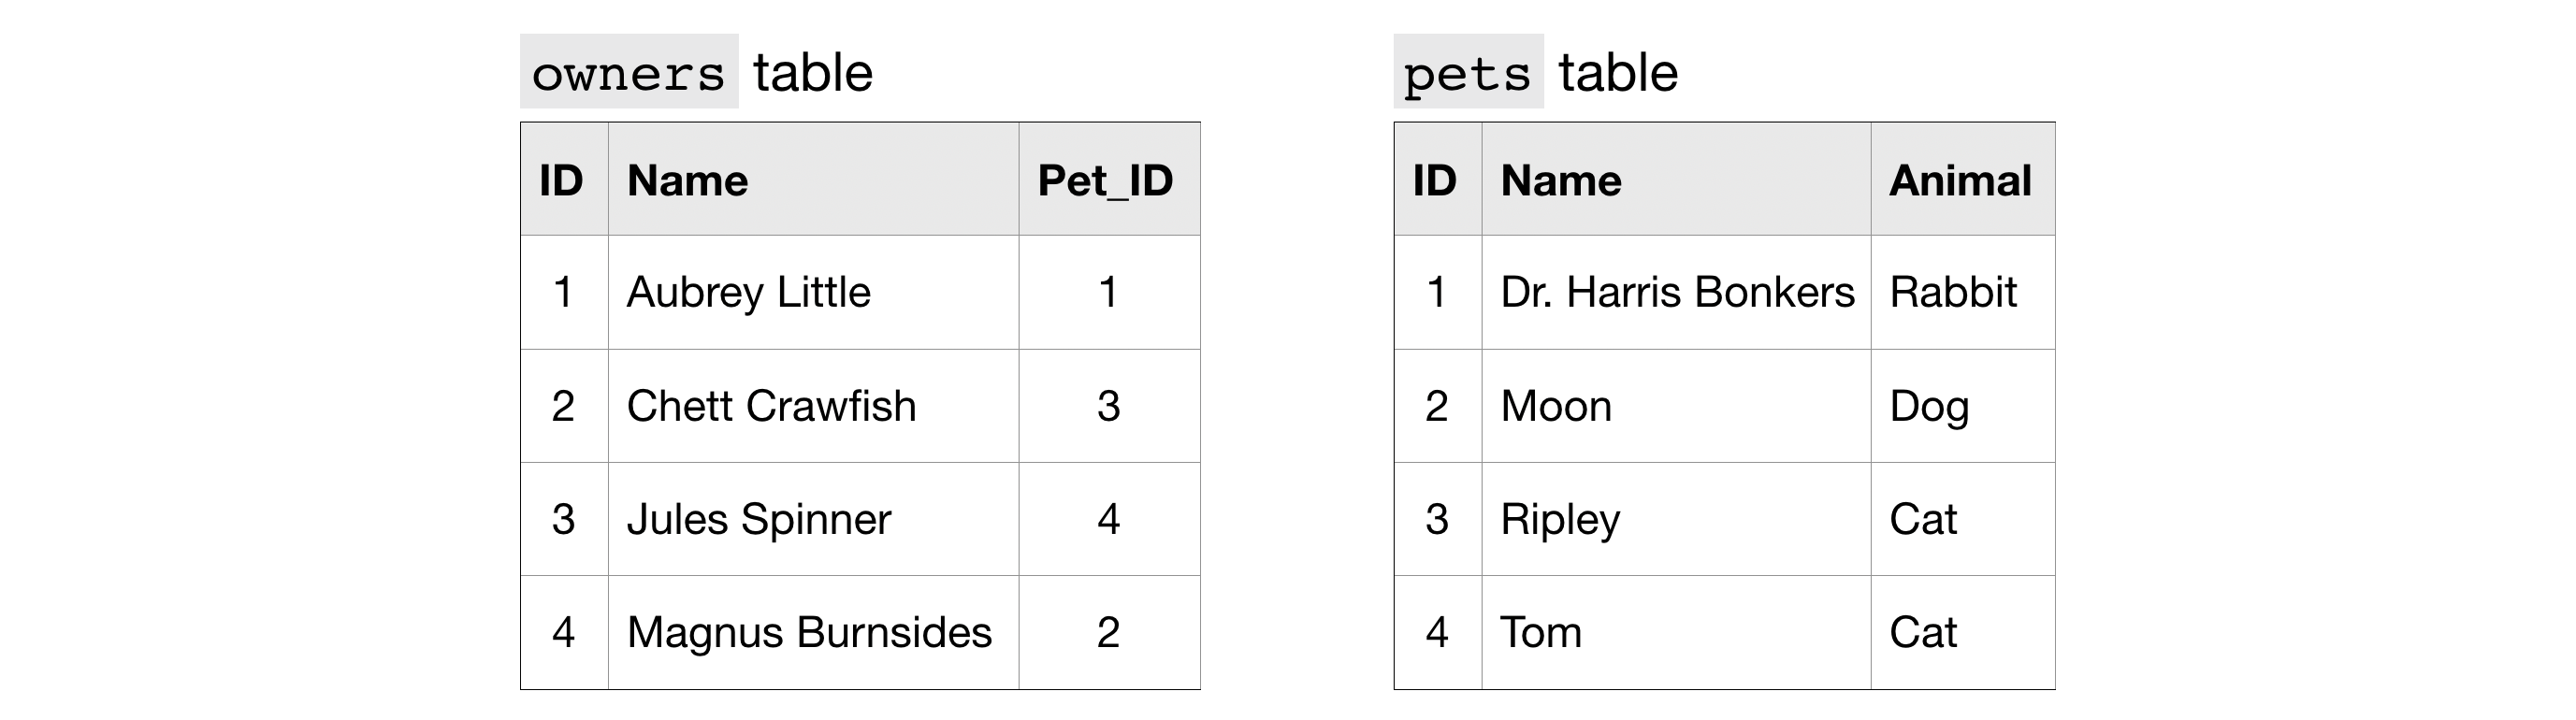

Para obter informações que se aplicam a um determinado animal de estimação, combinamos a coluna ID na tabela de animais de estimação com a coluna Pet_ID na tabela de proprietários.

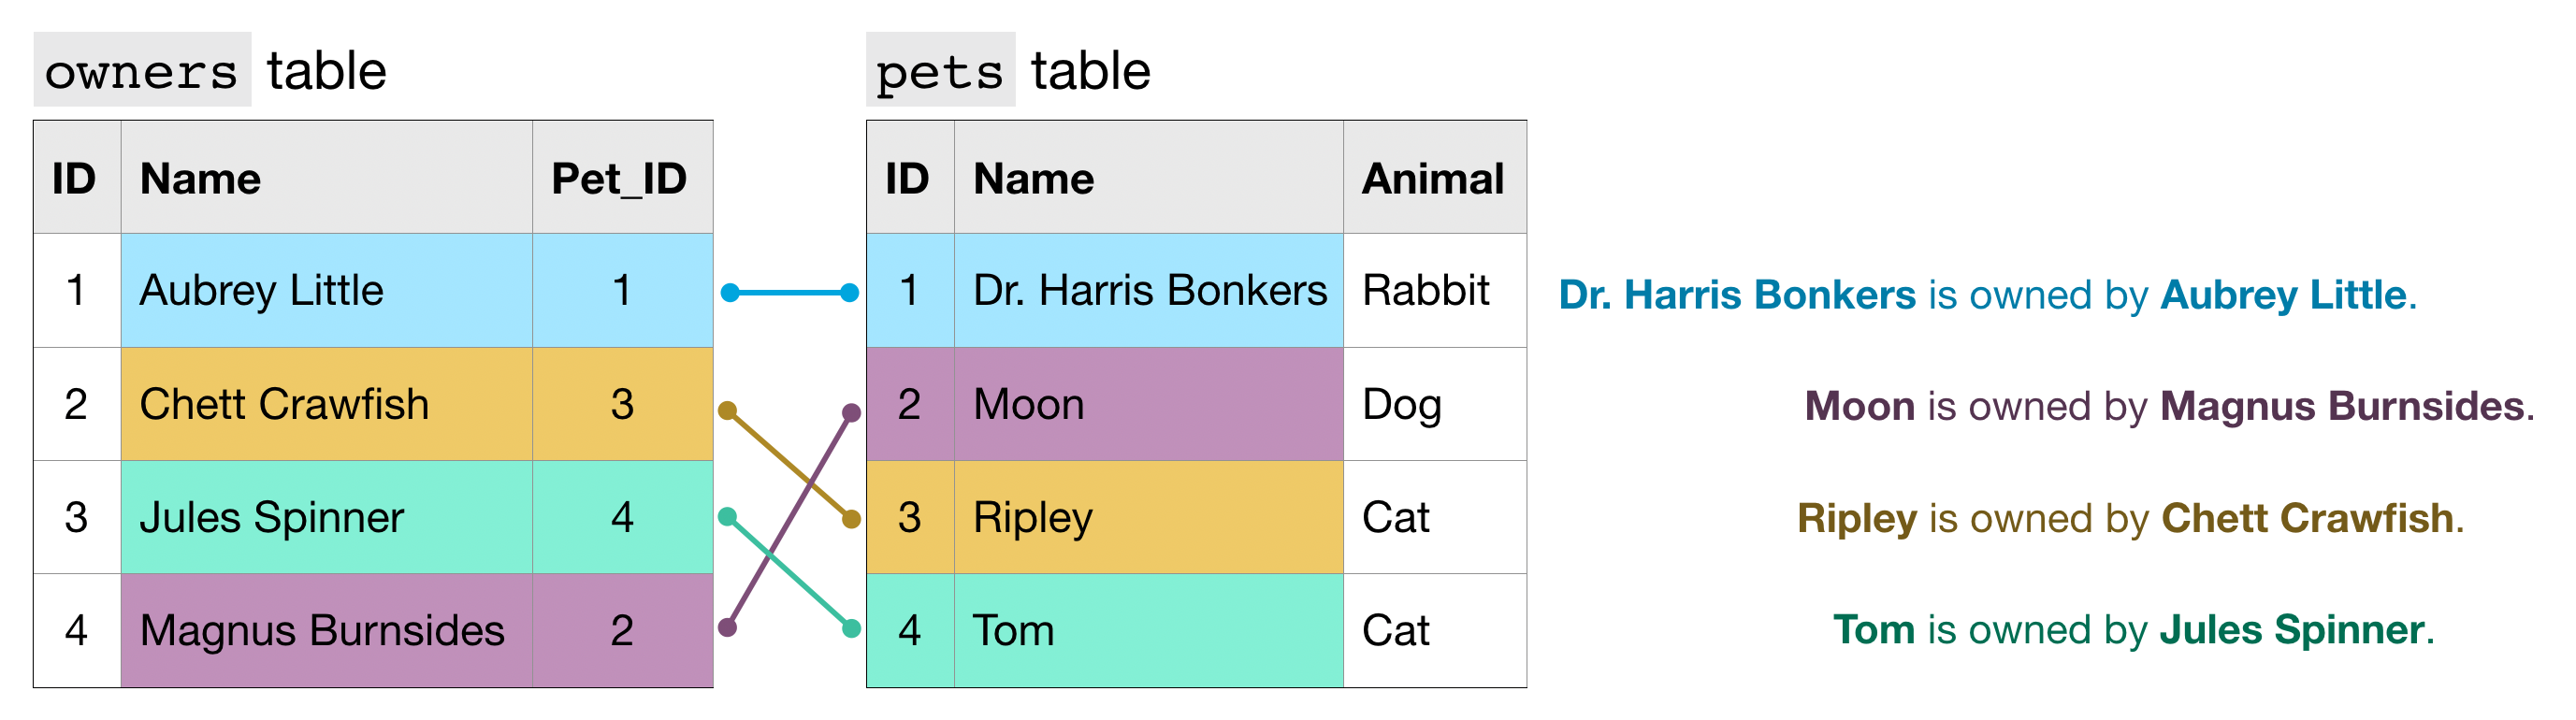

Por exemplo,

* a tabela de animais de estimação mostra que o Dr. Harris Bonkers é o animal de estimação com ID 1.
* A tabela de proprietários mostra que Aubrey Little é o dono do animal de estimação com ID 1.

Juntando esses dois fatos, o Dr. Harris Bonkers é propriedade de Aubrey Little.

Felizmente, não precisamos fazer isso manualmente para descobrir qual dono combina com qual animal de estimação. Na próxima seção, você aprenderá como usar JOIN para criar uma nova tabela combinando informações das tabelas de pets e donos.

## JOIN

---


Usando JOIN, podemos escrever uma consulta para criar uma tabela com apenas duas colunas: o nome do animal de estimação e o nome do proprietário.

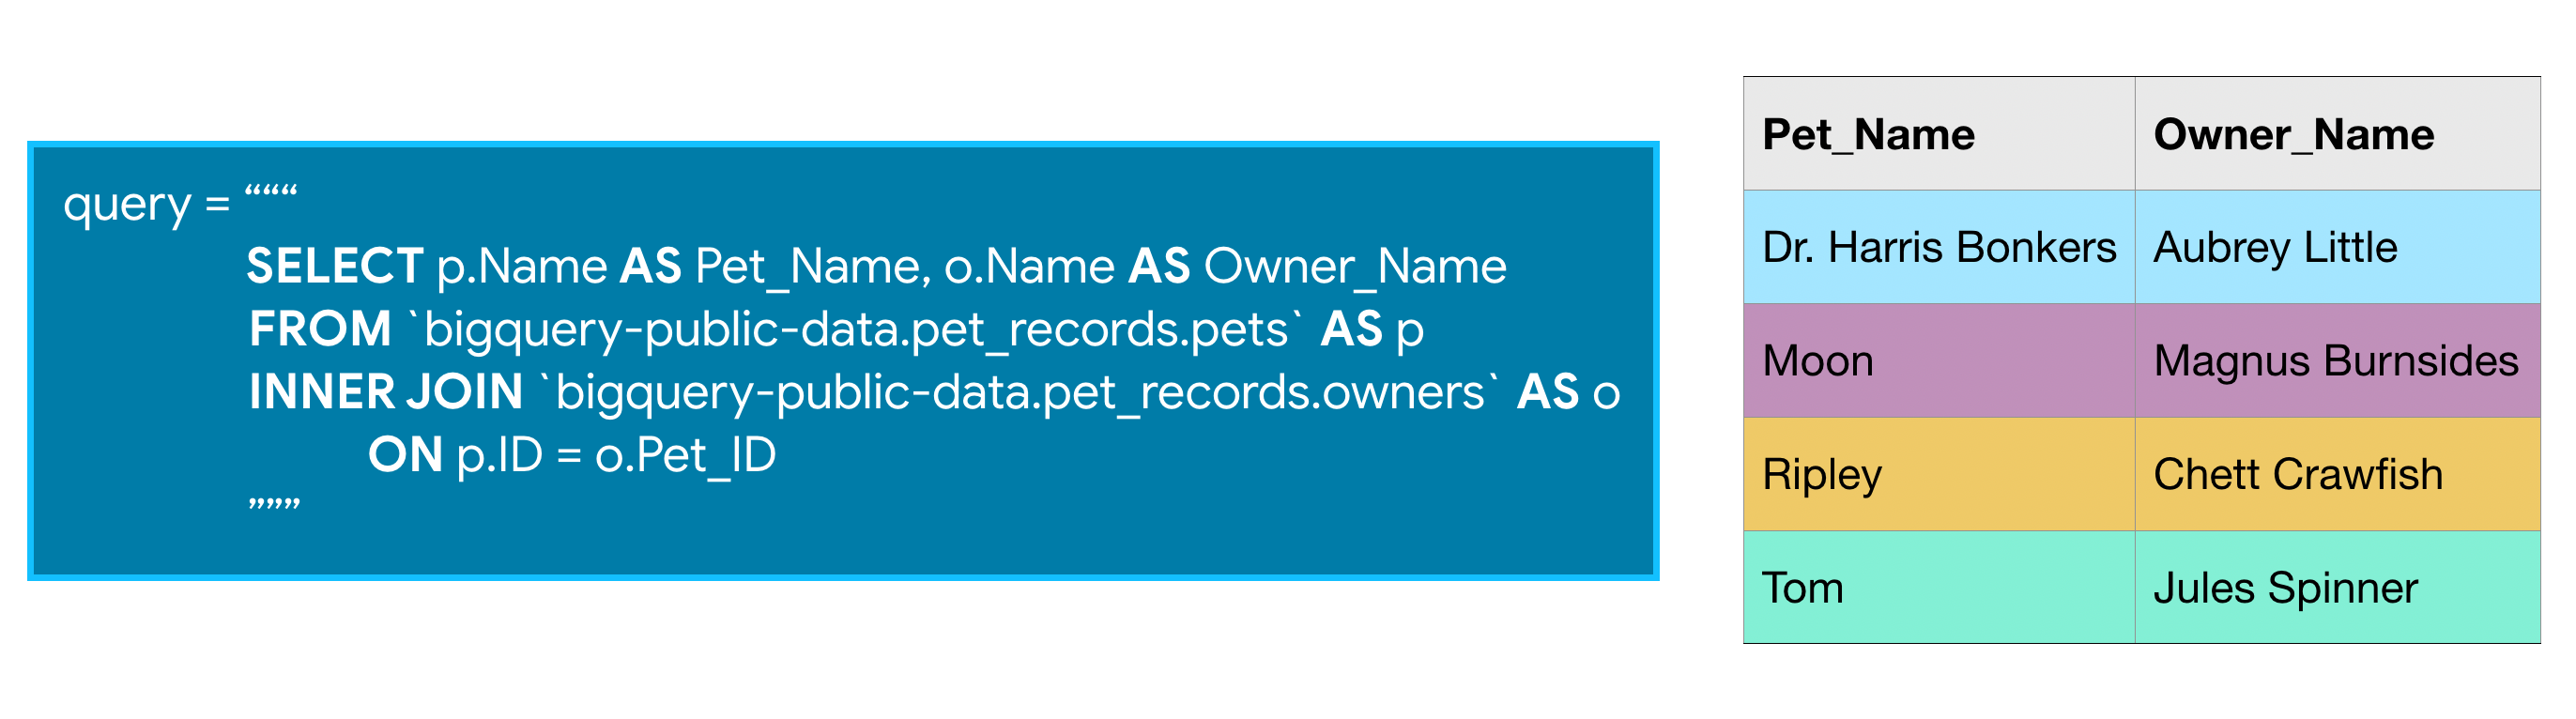

Combinamos as informações de ambas as tabelas combinando as linhas em que a coluna ID na tabela pets corresponde à coluna Pet_ID na tabela proprietários.

Na consulta, ON determina qual coluna em cada tabela usar para combinar as tabelas. Observe que, como a coluna ID existe em ambas as tabelas, precisamos esclarecer qual usar. Usamos p.ID para fazer referência à coluna ID da tabela pets e o.Pet_ID refere-se à coluna Pet_ID da tabela owner.

Em geral, quando você está unindo tabelas, é um bom hábito especificar de qual tabela cada uma de suas colunas vem. Dessa forma, você não precisa puxar o esquema toda vez que voltar para ler a consulta.

O tipo de JOIN que estamos usando hoje é chamado de INNER JOIN. Isso significa que uma linha só será colocada na tabela de saída final se o valor nas colunas que você está usando para combiná-las aparecer nas duas tabelas que você está unindo. Por exemplo, se o número de ID 4 de Tom não existisse na tabela pets, obteríamos apenas 3 linhas de volta dessa consulta. Existem outros tipos de JOIN, mas um INNER JOIN é muito usado, então é um bom começo.

## Exemplo: Quantos arquivos são cobertos por cada tipo de licença de software?


---


O GitHub é o local mais popular para colaborar em projetos de software. Um repositório GitHub (ou repo) é uma coleção de arquivos associados a um projeto específico.

A maioria dos repositórios no GitHub são compartilhados sob uma licença legal específica, que determina as restrições legais sobre como eles são usados. Para nosso exemplo, veremos quantos arquivos diferentes foram lançados sob cada licença.

Trabalharemos com duas tabelas no banco de dados. A primeira tabela é a tabela de licenças, que fornece o nome de cada repositório GitHub (na coluna repo_name) e sua licença correspondente. Aqui está uma visão das primeiras cinco linhas.

In [ ]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

A segunda tabela é a tabela sample_files, que fornece, entre outras informações, o repositório GitHub ao qual cada arquivo pertence (na coluna repo_name). As primeiras linhas desta tabela são impressas abaixo.

In [ ]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()

Em seguida, escrevemos uma consulta que usa informações em ambas as tabelas para determinar quantos arquivos são liberados em cada licença.

In [ ]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()

É uma grande consulta e, portanto, investigaremos cada parte separadamente.

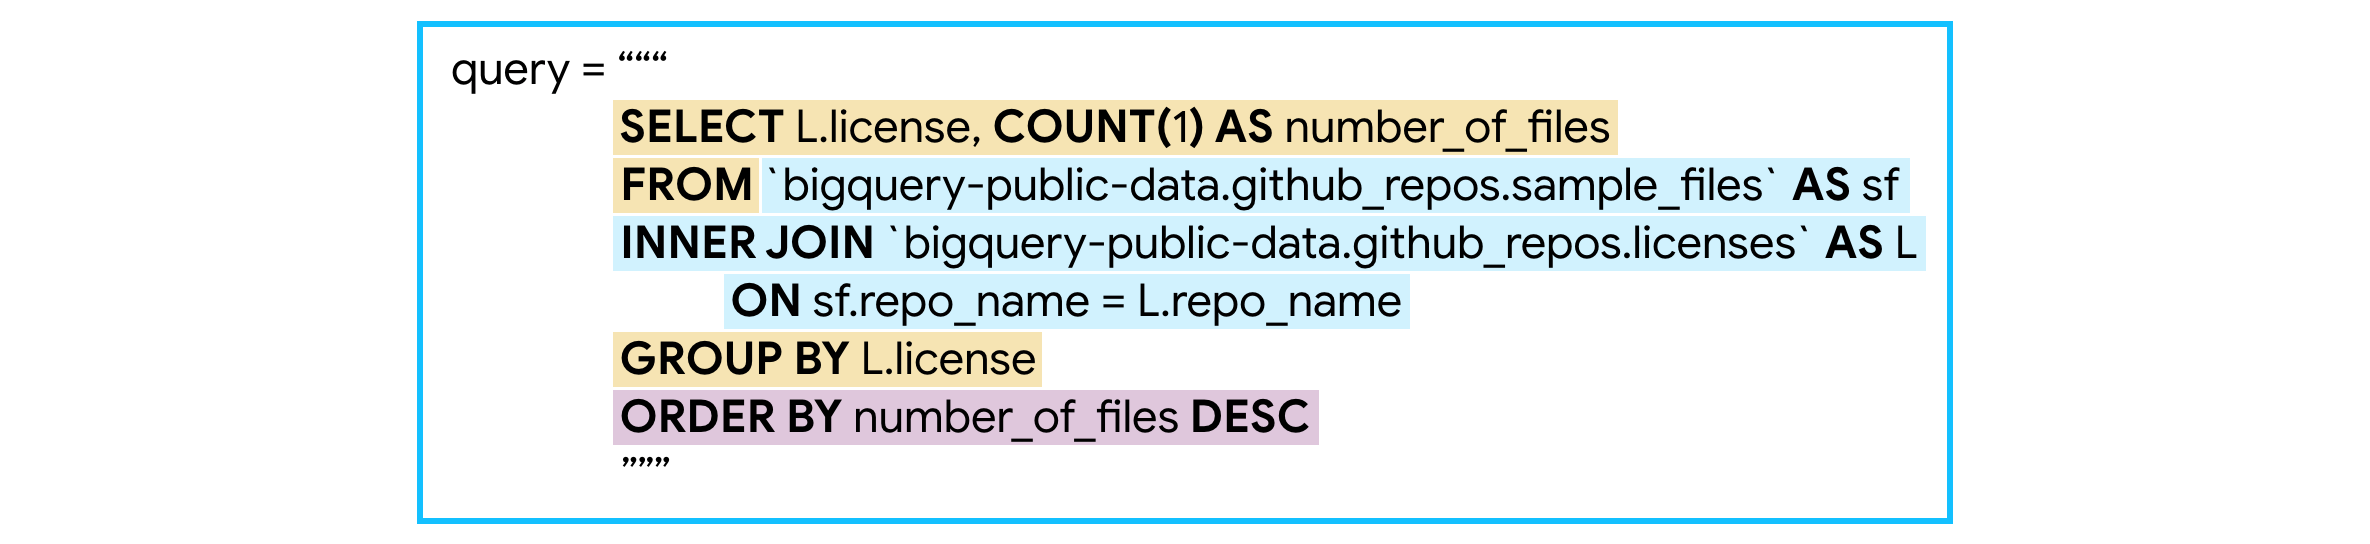

Começaremos com o JOIN (destacado em azul acima). Isso especifica as fontes de dados e como juntá-las. Usamos ON para especificar que combinamos as tabelas combinando os valores nas colunas repo_name nas tabelas.

A seguir, falaremos sobre SELECT e GROUP BY (destacados em amarelo). O GROUP BY divide os dados em um grupo diferente para cada licença, antes de contarmos o número de linhas na tabela sample_files que corresponde a cada licença. (Lembre-se de que você pode contar o número de linhas com COUNT(1).)

Por fim, o ORDER BY (destacado em roxo) classifica os resultados para que as licenças com mais arquivos apareçam primeiro.

Foi uma grande consulta, mas nos deu uma bela tabela resumindo quantos arquivos foram confirmados em cada licença:

In [ ]:
# Print the DataFrame
file_count_by_license

Você usará muito as cláusulas JOIN e ficará muito eficiente com elas à medida que for praticando.